<a href="https://colab.research.google.com/github/Hussy24/Predict-Price-for-Gifts/blob/main/hasnain_sajid(27199).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Read the CSV file
df = pd.read_csv('dataset.csv')
df.head


<bound method NDFrame.head of         gift_id  gift_type  gift_category  gift_cluster  \
0      GF_11156         61            534          3942   
1      GF_11157         61            534          3942   
2      GF_15689        584            262             0   
3      GF_11155         61            534          3942   
4      GF_11158         61            534          3942   
...         ...        ...            ...           ...   
20274  GF_10269        105            704          6448   
20275   GF_5854       1220            526           817   
20276    GF_563        509            705           821   
20277   GF_9107        682            213          5620   
20278   GF_5683       1061            212          4987   

                  instock_date        stock_update_date  lsg_1  lsg_2  lsg_3  \
0      2014-02-21 05:07:06.000  2016-11-09 15:49:51.000   3377   5221    504   
1      2014-02-21 06:07:06.000  2016-11-11 13:49:51.000   3377   5221    504   
2      2014-02-21 09:

In [9]:
# dropping null rows
df = df.dropna()

# Extract the input and target variables for predicting files
X = df[['volumes','price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
Y = df['price']

In [10]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the predicted values
print("Predicted values:", y_pred)

Predicted values: [ 93.86  72.39 157.92 ... 171.81  58.12  52.32]


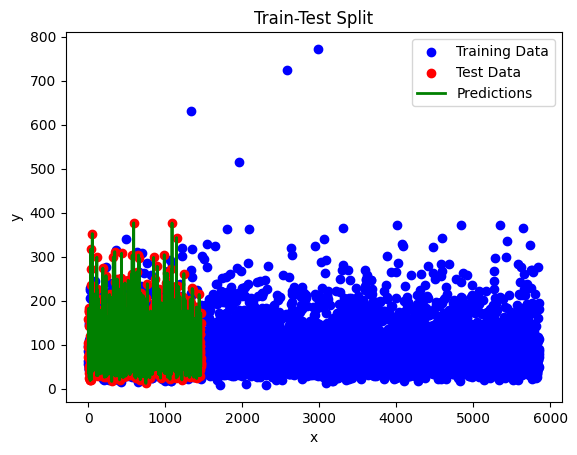

In [11]:
import matplotlib.pyplot as plt
# for error solution we had to convert the x_train and x_test to 1d array as they were 2D (found from stackoverflow)
x_train=np.arange(0,len(x_train),1)
x_test=np.arange(0,len(x_test),1)
#the above line has solved the problem
# Plot the train-test split
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 6.481922740030953e-13


In [13]:
# Using Z-score method to reduce RMSE
from scipy import stats

# Calculate Z-scores for each feature in X
z_scores = np.abs(stats.zscore(X))

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers by comparing the Z-scores with the threshold
outliers = np.where(z_scores > threshold)

# Remove the rows containing outliers
X_clean = X[(z_scores <= threshold).all(axis=1)]
Y_clean = Y[(z_scores <= threshold).all(axis=1)]

# Print the number of removed outliers
print("Number of removed outliers:", len(outliers[0]))

Number of removed outliers: 700


In [14]:
# Training the model again after optimization and changing test size

x_train, x_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Predicted values: [ 80.23  63.18 138.81 ... 117.51  60.02  25.86]
Root Mean Square Error (RMSE): 7.444798910693116e-13


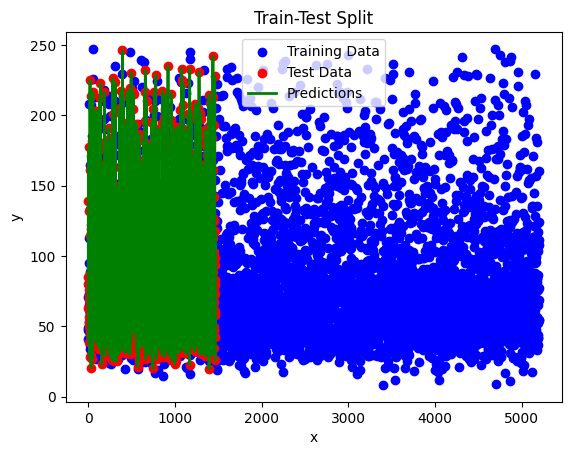

In [15]:
# new plot after z-score optimization

x_train=np.arange(0,len(x_train),1)
x_test=np.arange(0,len(x_test),1)
#the above line has solved the problem
# Plot the train-test split
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Apply data normalization using Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Split the normalized data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 6.403793118865416e-14


In [19]:
# More Improvement

from sklearn.feature_selection import SelectKBest, f_regression

# Convert X to a DataFrame
X_df = pd.DataFrame(X_clean, columns=X.columns)
# Apply feature selection
selector = SelectKBest(score_func=f_regression, k=10)  # Select the top 10 features
X_selected = selector.fit_transform(X_clean, Y_clean)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Print the selected feature names
print("Selected Features:", selected_feature_names)


# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Selected Features: Index(['volumes', 'price', 'gift_type', 'gift_category', 'lsg_1', 'lsg_2',
       'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6'],
      dtype='object')
Root Mean Square Error (RMSE): 4.2643699686884364e-13


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert X to a DataFrame
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply feature selection
selector = SelectKBest(score_func=f_regression, k=10)  # Select the top 10 features
X_selected = selector.fit_transform(X_df, Y_clean)

# Get the selected feature names
selected_feature_names = X_df.columns[selector.get_support()]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Selected Features: Index(['volumes', 'price', 'gift_type', 'gift_category', 'lsg_1', 'lsg_2',
       'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6'],
      dtype='object')
Root Mean Square Error (RMSE): 3.4232277855343676e-14


In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Convert X to a DataFrame
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply imputation to handle missing values
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X_df)

# Apply feature selection
selector = SelectKBest(score_func=f_regression, k=10)  # Select the top 10 features
X_selected = selector.fit_transform(X_imputed, Y_clean)


# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)


Root Mean Square Error (RMSE): 3.4232277855343676e-14


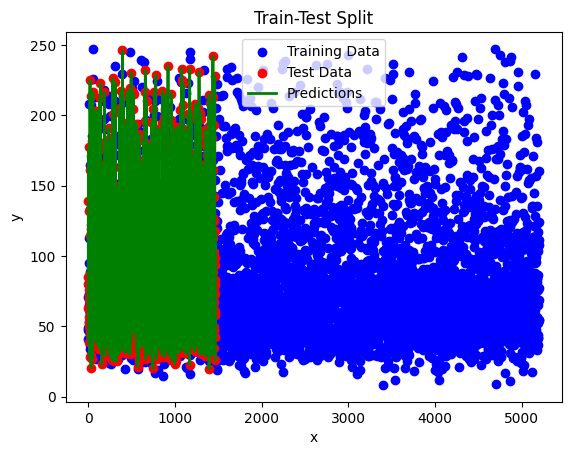

In [27]:
# new plot imputation optimization

x_train=np.arange(0,len(x_train),1)
x_test=np.arange(0,len(x_test),1)

# Plot the train-test split
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train-Test Split')
plt.legend()
plt.show()